# Mod 1 Assessment

### Congratulations on making it to your first assessment! Just a few reminders before you continue:
- This should only take an hour, so be sure to manage your time effectively.
- Read the instructions carefully for specified variable names.

If there is any confusion on a question, please ask for clarification from an instructor. </br>Though we can't give you the answer, we can help clear up any misunderstandings and get you back on track.

### Import all the necessary libraries/packages with the appropriate alias.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

## Section 1: Loops & Dictionaries (10 minutes)
Create a nested dictionary of recipes, with keys at the top level and dictionaries as their associated values.

1. Create an empty dictionary named **`recipes`**.
1. Add three dishes as the **keys** of your dictionary (e.g. 'meat pie')
1. For each key, the **value** should be another dictionary consisting of `ingredient: amount` pairs. (eg `'sugar': 'two cups'`) Each dish should have three ingredients.
1. Write a function called **`shopping_list`** to process the recipe dictionary. This function should loop through the recipes and return a single list of all ingredients needed across all recipes.

In [74]:
# your code here
recipes = {}

recipes['dal'] = {'red lentils': '2 cups', 'water': '6 cups', 'madras curry': '2 tbsp.'}
recipes['aloo gobi'] = {'potatoes': '2 units', 'cauliflower': '1 head', 'garam masala': '2 tbsp.'}
recipes['chana masala'] = {'chickpeas': '32 oz.', 'tomatoes': '32 oz.', 'cumin': '2 tbsp.'}
recipes

{'dal': {'red lentils': '2 cups',
  'water': '6 cups',
  'madras curry': '2 tbsp.'},
 'aloo gobi': {'potatoes': '2 units',
  'cauliflower': '1 head',
  'garam masala': '2 tbsp.'},
 'chana masala': {'chickpeas': '32 oz.',
  'tomatoes': '32 oz.',
  'cumin': '2 tbsp.'}}

In [75]:
# your code here
def shopping_list(recipes):
    ans = []
    for meal in recipes:
        ans += [recipes[meal][ingredient] + ' of ' + ingredient for ingredient in recipes[meal]]
    return ans

## Section 2: Data cleaning (15 Minutes)
Read data from `./data/weatherAUS.csv` and assign it to a variable named **`weather_df`**.
1. Add a `day`, `month`, and `year` column (three new columns) using the values from the `Date` column
1. Assign the variable **`incomplete_columns`** to a list of column names with missing values
1. Drop all columns except `day`, `month`, `year`, `Rainfall`, and `Sunshine`
1. Drop rows with missing values for `Rainfall`
1. Assign the variable **`mean_sunshine`** to the mean value of `Sunshine` in `weather_df`
1. Fill all `Sunshine` NaNs with the value of `mean_sunshine`

In [76]:
# your code here
weather_df = pd.read_csv('./data/weatherAUS.csv')
display(weather_df.head())
display(weather_df.info())

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164644 entries, 0 to 164643
Data columns (total 24 columns):
Date             164644 non-null object
Location         164644 non-null object
MinTemp          162668 non-null float64
MaxTemp          162866 non-null float64
Rainfall         160769 non-null float64
Evaporation      87028 non-null float64
Sunshine         79702 non-null float64
WindGustDir      152478 non-null object
WindGustSpeed    152542 non-null float64
WindDir9am       152045 non-null object
WindDir3pm       158786 non-null object
WindSpeed9am     162076 non-null float64
WindSpeed3pm     160005 non-null float64
Humidity9am      161569 non-null float64
Humidity3pm      158906 non-null float64
Pressure9am      146873 non-null float64
Pressure3pm      146876 non-null float64
Cloud9am         97868 non-null float64
Cloud3pm         93408 non-null float64
Temp9am          162505 non-null float64
Temp3pm          159856 non-null float64
RainToday        160769 non-null obje

None

In [77]:
#1
split_dates = []
for date in weather_df['Date']:
    split_dates.append(tuple(date.split('-')))
    
unzipped_split_dates = list(zip(*split_dates))

for i, date_sep in enumerate(['day', 'month', 'year']):
    weather_df[date_sep] = list(unzipped_split_dates[i])

In [78]:
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,day,month,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,01
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,02
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,03
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,04
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,05


In [79]:
#2
incomplete_columns = [col_name for col_name in weather_df.columns if weather_df[col_name].isna().sum() > 0]

In [80]:
#3
for col_name in weather_df.columns:
    if col_name not in ['day', 'month', 'year', 'Rainfall', 'Sunshine']:
        weather_df = weather_df.drop(col_name, axis=1)

In [81]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164644 entries, 0 to 164643
Data columns (total 5 columns):
Rainfall    160769 non-null float64
Sunshine    79702 non-null float64
day         164644 non-null object
month       164644 non-null object
year        164644 non-null object
dtypes: float64(2), object(3)
memory usage: 6.3+ MB


In [82]:
weather_df = weather_df.drop(weather_df.loc[weather_df['Rainfall'].isna()].index)

In [83]:
weather_df.describe()

,Rainfall,Sunshine
count,160769.000000,78509.00000
mean,2.254788,7.64119
std,8.355725,3.75691
min,0.000000,0.00000
25%,0.000000,4.90000
50%,0.000000,8.50000
75%,0.600000,10.60000
max,474.000000,14.50000


In [84]:
# your code here
mean_sunshine = weather_df['Sunshine'].mean()

In [85]:
weather_df['Sunshine'] = weather_df['Sunshine'].fillna(mean_sunshine)

## Section 3: Visualization (15 Minutes)

As best you can, recreate this bar chart created in Google Sheets using Python.  You may use Matplotlib, Seaborn, or any other graphing library you came across.

<img src="./data/chart.jpg" alt="chart to recreate" width="500"/>

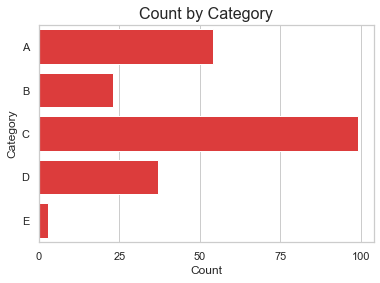

In [130]:
sns.set(style="whitegrid")
d = {'x':[54, 23, 99, 37, 3], 'y':['A', 'B', 'C', 'D', 'E']}
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
g = sns.barplot(x='x', y='y', data=d, palette=sns.color_palette(["#f72121"]))
plt.title("Count by Category", fontsize=16)
plt.ylabel("Category")
plt.xlabel("Count")
plt.show()

## Section 4: Github (5 Minutes)

Follow the instructions at https://github.com/enkeboll/dcds-111819-gifs, and make sure to check your email to confirm your collaborator status!

When finished, submit your assessment as `mod1_assessment.ipynb` (do not change the name, please!) at [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe65CBEptywZH048tq7caQL_9CvMs1k0C8EPY80FxvWESBdIg/viewform?usp=sf_link)